In [2]:
import pandas as pd
from glob import glob
from functools import partial
import matplotlib.pyplot as plt
from droplet_growth.mic import poisson
from droplet_growth import fit
import numpy as np
import re
import seaborn as sns
%load_ext autoreload
%autoreload 2

# Find all datasets

In [3]:
paths = sorted(glob('/home/aaristov/Anchor/Lena/Data/*/*/table.csv'))
paths

['/home/aaristov/Anchor/Lena/Data/20210617-MIC_OD_6e-4_0-10ng/24h/table.csv',
 '/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/Composites/table.csv',
 '/home/aaristov/Anchor/Lena/Data/20210629-MIC-24h/composites/table.csv',
 '/home/aaristov/Anchor/Lena/Data/20210701-MIC-24h/composites/table.csv',
 '/home/aaristov/Anchor/Lena/Data/20210705-MIC-0h/composites-24h/table.csv']

In [5]:
pd.read_csv(paths[0], index_col=0)

label            x             y  n_cells       std  ng  poisson fit  \
0         1   663.248626    417.128241        1  2.729086   0     0.523845   
1         2   664.647675    948.961450        0  2.618061   0     0.523845   
2         3   665.043884   1475.729516        0  2.670377   0     0.523845   
3         4   661.226322  16298.040220        1  3.148975   0     0.523845   
4         5   660.757642  16826.050217        1  2.990367   0     0.523845   
...     ...          ...           ...      ...       ...  ..          ...   
3001    497  5962.000000   4646.000000        0  2.251671  10     0.625791   
3002    498  5961.897296   5177.702880        0  2.405158  10     0.625791   
3003    499  5961.526499   5706.998255        1  3.113648  10     0.625791   
3004    500  5961.537016   6236.971642        0  2.454742  10     0.625791   
3005    501  5961.585169   6765.801022        0  2.273699  10     0.625791   

      n24  final_state  
0      12         True  
1       0        False  
2       0        False  
3      18         True  
4      12         True  
...   ...          ...  
3001    0        False  
3002    1        False  
3003    1        False  
3004    0        False  
3005    0        False  

[3006 rows x 9 columns]

In [17]:
def plot_mic(path, ax=None):
    print(path)
    if isinstance(path, tuple):
        rep, path = path
    df = pd.read_csv(path, index_col=0)
    date = re.compile('/Data/(\d+)-').findall(path)[0]
    
    (ng := df.groupby(['ng']).mean()).plot(y='final_state', marker='o', ax=ax[0], label=f'replicate {rep+1}: λ={(pf := df["poisson fit"]).mean():.1f} $\pm$ {pf.std():.1f}')
    ax[0].set_title('Positive counts raw (24h)')
    
#     ng.plot(y='poisson fit', marker='o', ax=ax[1], label=f'{date}: λ={(pf := df["poisson fit"]).mean():.1f} $\pm$ {pf.std():.1f}')
#     ax[1].set_title('Inoculum size (0h)')
    
#     df.loc[:, 'has_cell'] = df.n_cells > 0
#     ng.loc[:,'norm_susceptibility'] = (ss := df.groupby(['ng']).sum()).final_state / ss.has_cell
#     ng.plot(y='norm_susceptibility',ax=ax[2], marker='o', label=f'{date}: λ={(pf := df["poisson fit"]).mean():.1f} $\pm$ {pf.std():.1f}')
#     ax[2].set_title('Positive counts normalized by a number of inoculated wells')
    return ng

## Plot postitve wells counts

/home/aaristov/Anchor/Lena/Data/20210617-MIC_OD_6e-4_0-10ng/24h/table.csv


UnboundLocalError: local variable 'rep' referenced before assignment

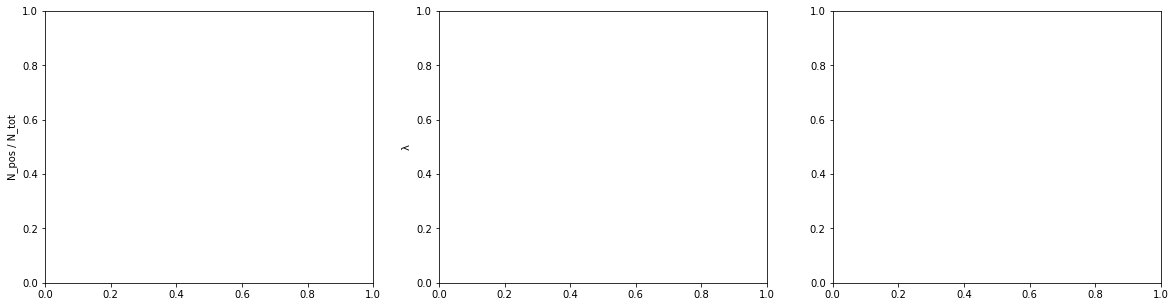

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
ax[0].set_ylabel('N_pos / N_tot')
ax[1].set_ylabel('λ')
out = list(map(partial(plot_mic, ax=ax), paths))

(0, '/home/aaristov/Anchor/Lena/Data/20210617-MIC_OD_6e-4_0-10ng/24h/table.csv')
(1, '/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/Composites/table.csv')
(2, '/home/aaristov/Anchor/Lena/Data/20210629-MIC-24h/composites/table.csv')
(3, '/home/aaristov/Anchor/Lena/Data/20210701-MIC-24h/composites/table.csv')
(4, '/home/aaristov/Anchor/Lena/Data/20210705-MIC-0h/composites-24h/table.csv')


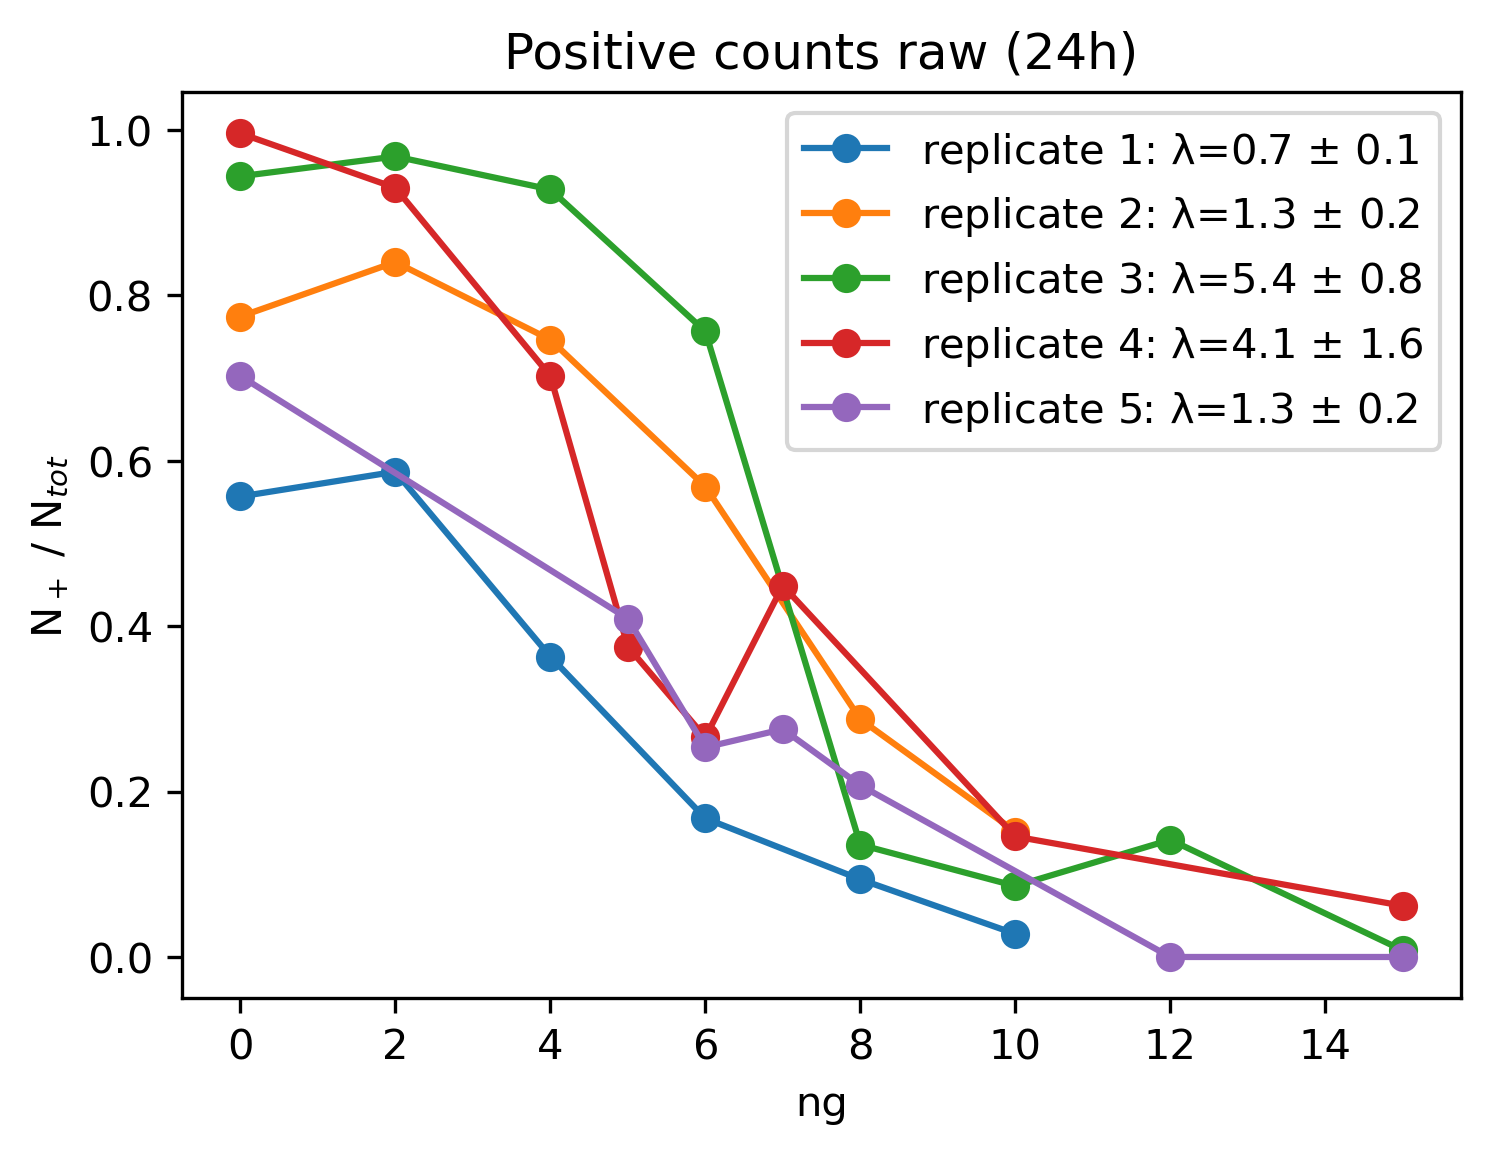

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(5.5,4), dpi=300)
ax.set_ylabel('N$_+$ / N$_{tot}$')
# ax[1].set_ylabel('λ')
out = list(map(partial(plot_mic, ax=(ax,)), enumerate(paths)))
fig.savefig('raw_counts.pdf')

## Plot single cell probabiblities

In [74]:
def plot_single_cell_prob(path, ax=None):
    df = pd.read_csv(path, index_col=0)
    date = re.compile('/Data/(\d+)-').findall(path)[0]
    df.q.plot(label=date, ax=ax)
    plt.title('Single cell susceptibility to CF')
    df.loc[:, 'date'] = str(date[4:])
    df.loc[:, 'ng'] = df.index
    return df

In [7]:
prob_paths = sorted(glob('/home/aaristov/Anchor/Lena/Data/*/prob.csv'))
prob_paths

['/home/aaristov/Anchor/Lena/Data/20210617-MIC_OD_6e-4_0-10ng/prob.csv',
 '/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/prob.csv',
 '/home/aaristov/Anchor/Lena/Data/20210629-MIC-24h/prob.csv',
 '/home/aaristov/Anchor/Lena/Data/20210701-MIC-24h/prob.csv',
 '/home/aaristov/Anchor/Lena/Data/20210705-MIC-0h/prob.csv']

In [8]:
pd.read_csv(prob_paths[0], index_col=0)

prob_survive         q     precision       MSE
ng                                                
0       0.863101  0.136899  [0.03160094]  0.000861
2       0.798056  0.201944  [0.07477297]  0.005274
4       0.460227  0.539773  [0.03254603]  0.002970
6       0.277714  0.722286  [0.04315247]  0.014391
8       0.033307  0.966693  [0.02894209]  0.029969
10      0.022288  0.977712  [0.01508105]  0.008715

prob_survive         q     precision           MSE  date  ng
ng                                                              
0   8.631011e-01  0.136899  [0.03160094]  8.613906e-04  0617   0
2   7.980558e-01  0.201944  [0.07477297]  5.274446e-03  0617   2
4   4.602266e-01  0.539773  [0.03254603]  2.970329e-03  0617   4
6   2.777141e-01  0.722286  [0.04315247]  1.439075e-02  0617   6
8   3.330708e-02  0.966693  [0.02894209]  2.996894e-02  0617   8
10  2.228848e-02  0.977712  [0.01508105]  8.715204e-03  0617  10
0   8.191642e-01  0.180836  [0.08873028]  7.186579e-03  0623   0
2   9.192464e-01  0.080754  [0.01189074]  1.161060e-04  0623   2
4   7.383548e-01  0.261645  [0.01766203]  3.298386e-04  0623   4
6   4.642163e-01  0.535784  [0.05051575]  7.018788e-03  0623   6
8   1.737397e-01  0.826260  [0.01154306]  1.966423e-03  0623   8
10  3.366934e-02  0.966331  [0.01962014]  1.374098e-02  0623  10
0   7.330091e-01  0.266991  [0.04320997]  1.997505e-03  0629   0
2   8.942279e-01  0.105772  [0.04681604]  1.833866e-03  0629   2
4   1.000000e+00  0.000000    [0.074741]  4.468973e-03  0629   4
6   2.828580e-01  0.717142  [0.00941462]  6.639202e-04  0629   6
8   2.680021e-02  0.973200  [0.00260754]  2.533236e-04  0629   8
10  1.990715e-02  0.980093   [0.0025658]  2.560301e-04  0629  10
12  2.747085e-03  0.997253  [0.00310827]  4.179369e-04  0629  12
15  1.846762e-03  0.998153  [0.00144546]  9.088834e-05  0629  15
0   8.710631e-01  0.128937   [0.0083812]  6.007650e-05  0701   0
2   9.086061e-01  0.091394  [0.00142769]  1.686152e-06  0701   2
4   4.330173e-01  0.566983  [0.01614367]  8.369969e-04  0701   4
5   8.736935e-02  0.912631  [0.00799519]  1.628802e-03  0701   5
6   1.574737e-01  0.842526  [0.01001257]  1.639711e-03  0701   6
7   1.795365e-01  0.820463   [0.0055254]  4.343832e-04  0701   7
10  1.048297e-02  0.989517  [0.00216958]  1.940948e-04  0701  10
15  2.022790e-03  0.997977  [0.00111431]  5.395464e-05  0701  15
0   7.372000e-01  0.262800  [0.05095745]  2.752456e-03  0705   0
5   3.862803e-01  0.613720  [0.02937453]  3.549182e-03  0705   5
6   1.958713e-01  0.804129   [0.0090078]  1.041589e-03  0705   6
7   7.271892e-02  0.927281  [0.02128347]  1.265853e-02  0705   7
8   1.346589e-01  0.865341  [0.01385215]  3.625822e-03  0705   8
12  2.181057e-12  1.000000         [inf]  5.232596e-23  0705  12
15  2.181057e-12  1.000000         [inf]  5.232596e-23  0705  15

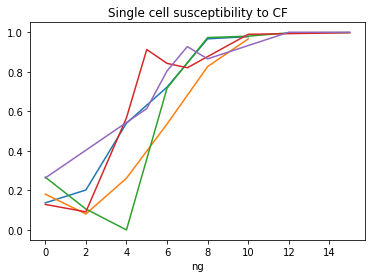

In [76]:
probs = pd.concat(map(plot_single_cell_prob, prob_paths))
probs

(array([  3.85070924, 308.56796627]), (0.7278467777863858, 366.00634008602276))

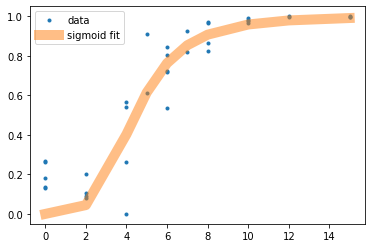

In [98]:
fig, ax = plt.subplots()
popt, err = fit.fit_sigmoid(probs, ax, fun=fit.hill)
popt, err

(array([0.26739286, 4.40348677]), (0.0374982839782446, 0.2514035818745919))

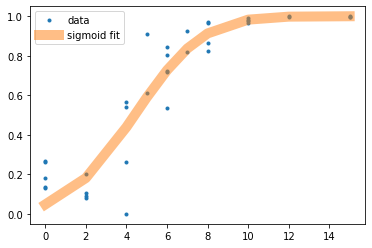

In [92]:
fig, ax = plt.subplots()
epopt, eerr = fit.fit_sigmoid(probs, ax, fun=fit.erf_fun)
epopt, eerr

Text(0.5, 1.0, 'Single cell susceptibility')

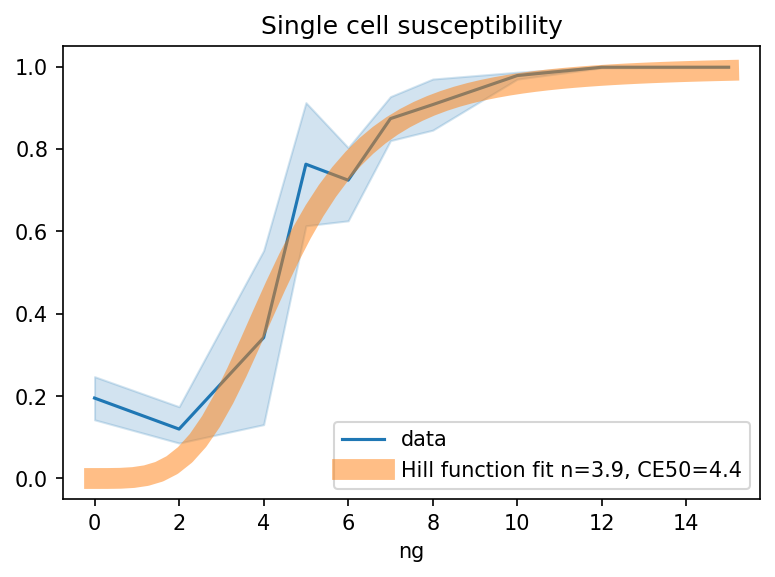

In [79]:
fig, ax = plt.subplots(dpi=150)
sns.lineplot(data=probs.q, label='data')
plt.plot((x := np.linspace(0, probs.index.max(), 50)), fit.hill(x, *popt), lw=10, alpha=.5, color='tab:orange', label=f'Hill function fit n={popt[0]:.1f}, CE50={popt[1] ** (1/popt[0]):.1f}')
plt.legend()
plt.xlabel('ng')
plt.title('Single cell susceptibility')

In [99]:
probs.to_csv('probs2021.csv')

Text(0.5, 1.0, 'Single cell susceptibility')

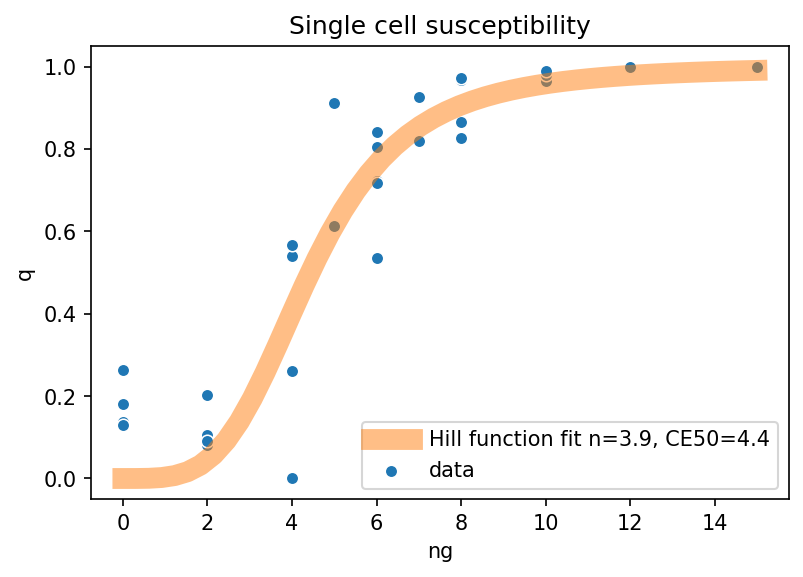

In [80]:
fig, ax = plt.subplots(dpi=150)
sns.scatterplot(data=probs, x='ng', y='q', label='data')
plt.plot((x := np.linspace(0, probs.index.max(), 50)), fit.hill(x, *popt), lw=10, alpha=.5, color='tab:orange', label=f'Hill function fit n={popt[0]:.1f}, CE50={popt[1] ** (1/popt[0]):.1f}')
plt.legend()
plt.xlabel('ng')
plt.title('Single cell susceptibility')

Text(0.5, 1.0, 'Single cell susceptibility')

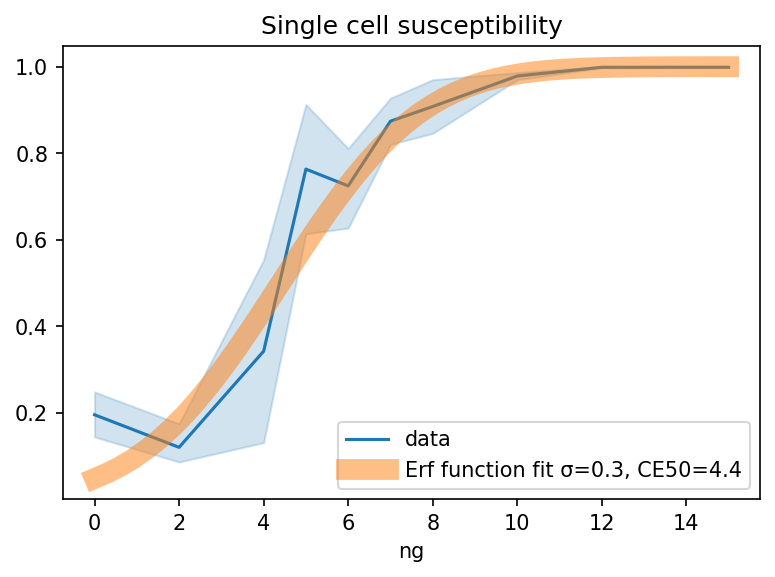

In [96]:
fig, ax = plt.subplots(dpi=150)
sns.lineplot(data=probs.q, label='data')
plt.plot((x := np.linspace(0, probs.index.max(), 50)), fit.erf_fun(x, *epopt), lw=10, alpha=.5, color='tab:orange', label=f'Erf function fit σ={epopt[0]:.1f}, CE50={epopt[1]:.1f}')
plt.legend()
plt.xlabel('ng')
plt.title('Single cell susceptibility')

Text(0.5, 1.0, 'Single cell susceptibility')

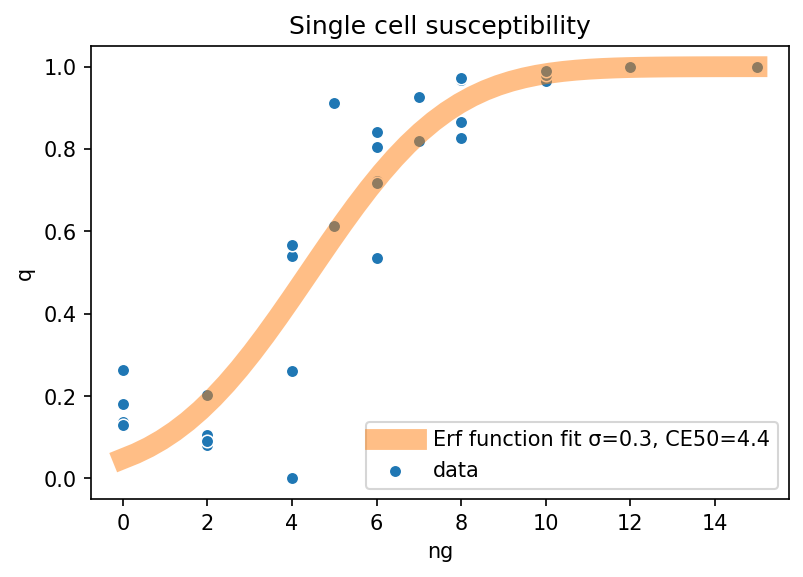

In [97]:
fig, ax = plt.subplots(dpi=150)
sns.scatterplot(data=probs, x='ng', y='q', label='data')
plt.plot((x := np.linspace(0, probs.index.max(), 50)), fit.erf_fun(x, *epopt), lw=10, alpha=.5, color='tab:orange', label=f'Erf function fit σ={epopt[0]:.1f}, CE50={epopt[1]:.1f}')
plt.legend()
plt.xlabel('ng')
plt.title('Single cell susceptibility')

Text(0.5, 0, 'ng')

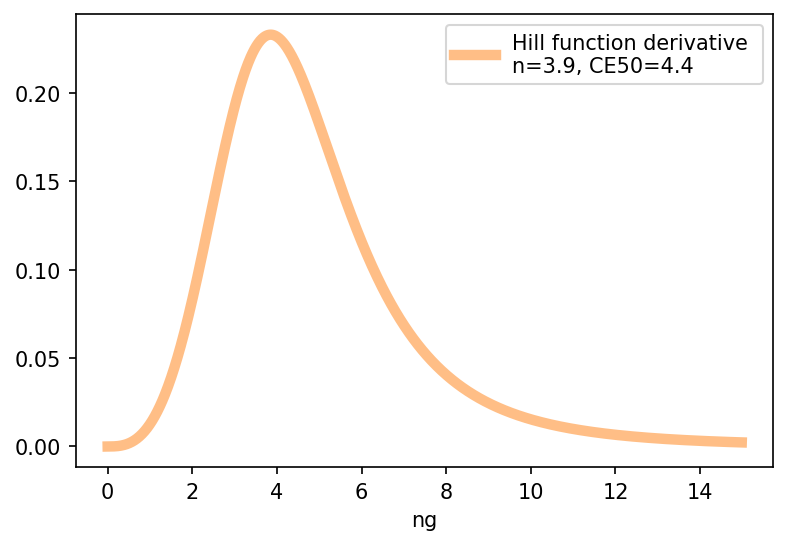

In [88]:
fig, ax = plt.subplots(dpi=150)
plt.plot((x := np.linspace(0, probs.index.max(), 1000))[:-1], np.diff(fit.hill(x, *popt)) / 15 * 1000, 
         lw=5, alpha=.5, color='tab:orange', label=f'Hill function derivative \nn={popt[0]:.1f}, CE50={popt[1] ** (1/popt[0]):.1f}')
plt.legend()
plt.xlabel('ng')


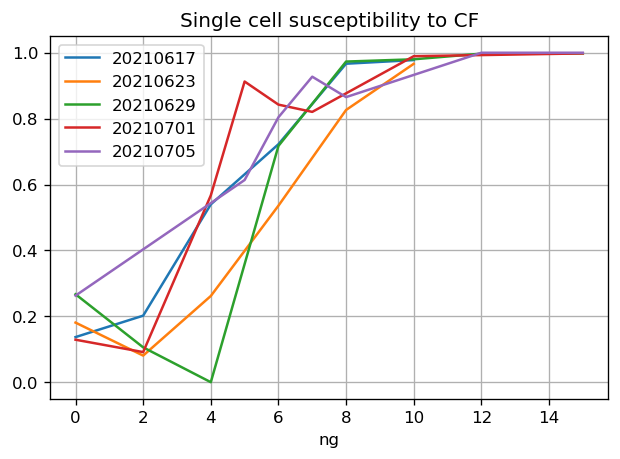

In [89]:
fig, ax = plt.subplots(dpi=120)
[plot_single_cell_prob(p, ax=ax) for p in prob_paths]
plt.legend()
plt.grid()
plt.show()